Epoch 0 | Pérdida: 1.6510789995379327
Epoch 100 | Pérdida: 0.03727965029171485
Epoch 200 | Pérdida: 0.024160151305122373
Epoch 300 | Pérdida: nan
Epoch 400 | Pérdida: nan
Epoch 500 | Pérdida: nan
Epoch 600 | Pérdida: nan
Epoch 700 | Pérdida: nan


<ipython-input-5-04a1ff18eefc>:47: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))
<ipython-input-5-04a1ff18eefc>:47: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))


Epoch 800 | Pérdida: nan
Epoch 900 | Pérdida: nan
Precisión final: 100.00%


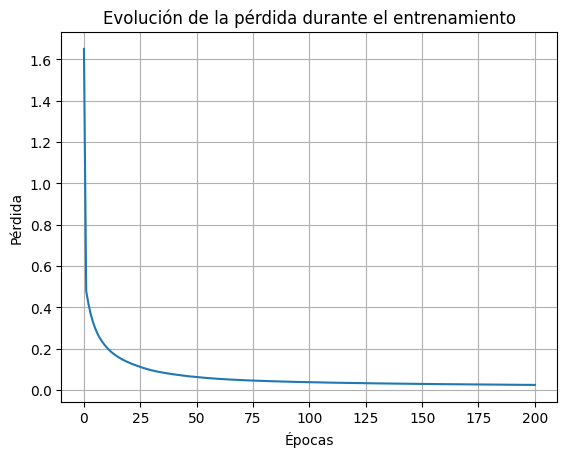

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Creación del dataset de ejemplo
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 puntos, 2 características
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0).reshape(-1, 1)  # Etiquetas binarias (0 o 1)

# Parámetros de la red
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000

# Inicialización aleatoria de pesos
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Lista para almacenar la pérdida en cada época
losses = []

# Entrenamiento de la red
for epoch in range(epochs):
    # Paso hacia adelante (forward pass)
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Cálculo del error (pérdida)
    loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    losses.append(loss)  # Guardamos la pérdida para graficar

    # Paso hacia atrás (backpropagation)
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Actualización de los pesos
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Pérdida: {loss}")

# Predicciones finales
predictions = (a2 > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print(f"Precisión final: {accuracy * 100:.2f}%")

# Graficar la pérdida a lo largo del tiempo
plt.plot(losses)
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

